In [1]:
import tensorflow as tf

print(tf.__version__)

2.5.0-dev20201125


In [2]:
from keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\VV\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\VV\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If y

In [3]:
print('train_data[0]',train_data[0])
m=max([ max( sequence) for sequence in train_data])
print('max index:',m)
print('length',len(test_data),len(train_data))

train_data[0] [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
max index: 9999
length 25000 25000


In [4]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    
    #用one-hot的方法把所有单词所在的index用矩阵0/1表示出来，矩阵中1的位置表示存在对应index的单词
    for i, sequences in enumerate(sequences):
        results[i,sequences]=1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
print('句段向量化之后测试train_data[0]：',x_train[0])

句段向量化之后测试train_data[0]： [0. 1. 1. ... 0. 0. 0.]


In [6]:
#将labels向量化，储存格式为float32
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [39]:
from keras import models
from keras import layers

#搭建网络层
model = models.Sequential()
model.add(layers.Dense(8, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#配置优化器
from keras import optimizers
#losses metrics为自定义指标（可选）
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
               loss='binary_crossentropy',
               metrics=['acc'])

#验证方法：x_train留出10000个样本为验证集
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

#现在用512个样本组成小批量，将模型训练20个轮次次（ 即对 x_train 和 y_train 两个张
#量中的所有样本进行20次迭代）。与此同时，你还要监控在留出的10 000 
#个样本上的损失和精度。你可以通过将验证数据传入validation_ data参数来完成。
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/4
30/30 [==============================] - 1s 33ms/step - loss: 0.6154 - acc: 0.6679 - val_loss: 0.4509 - val_acc: 0.8558
Epoch 2/4
30/30 [==============================] - 1s 24ms/step - loss: 0.3919 - acc: 0.8905 - val_loss: 0.3530 - val_acc: 0.8755
Epoch 3/4
30/30 [==============================] - 1s 24ms/step - loss: 0.2834 - acc: 0.9173 - val_loss: 0.3024 - val_acc: 0.8878
Epoch 4/4
30/30 [==============================] - 1s 23ms/step - loss: 0.2223 - acc: 0.9366 - val_loss: 0.2883 - val_acc: 0.8879


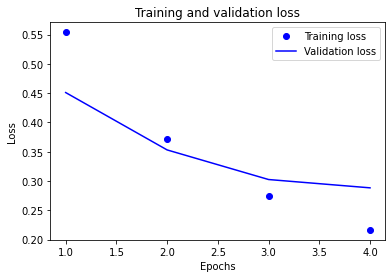

In [40]:
import matplotlib.pyplot as plt

#训练中所有的数据：history
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
result=model.evaluate(x_test,y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.3014 - acc: 0.8810
